# Hey there!

Welcome to class 67-300 (Search Engines). This is going to be a highly hands on class. Let's start experimenting!

The first thing that we need is some text. We can have fun with lots of books from project Gutenberg.

In [1]:
# Assuming that Frankenstein was downloaded from http://www.gutenberg.org/ebooks/84 
# (more specifically from http://www.gutenberg.org/cache/epub/84/pg84.txt)
# It can be loaded using:
filename = "./resources/frankenstein.txt"

with open(filename, "rb") as f:
    content = f.read()
content


'\xef\xbb\xbfProject Gutenberg\'s Frankenstein, by Mary Wollstonecraft (Godwin) Shelley\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: Frankenstein\r\n       or The Modern Prometheus\r\n\r\nAuthor: Mary Wollstonecraft (Godwin) Shelley\r\n\r\nRelease Date: June 17, 2008 [EBook #84]\r\n\r\nLanguage: English\r\n\r\n\r\n*** START OF THIS PROJECT GUTENBERG EBOOK FRANKENSTEIN ***\r\n\r\n\r\n\r\n\r\nProduced by Judith Boss, Christy Phillips, Lynn Hanninen,\r\nand David Meltzer. HTML version by Al Haines.\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\n\r\nFrankenstein,\r\n\r\nor the Modern Prometheus\r\n\r\n\r\nby\r\n\r\nMary Wollstonecraft (Godwin) Shelley\r\n\r\n\r\n\r\n\r\nLetter 1\r\n\r\n\r\nSt. Petersburgh, Dec. 11th, 17--\r\n\r\nTO Mrs. Saville, England\r\n\r\nYou

# Let's look at some important statistics!

Okay, document content is loaded. Now let's take a look at the preprocessing steps we have learnt.

#### (1) Remove special chars? Keep special chars? Think of hyphens (pre-processing) or contractions (it's, let's, you're).
#### (2) Lower case every token? New York -> new york?
#### (3) Remove stopwords?
#### (4) Apply stemming? Which one?



In [2]:
tokens = content.split()
tokens

['\xef\xbb\xbfProject',
 "Gutenberg's",
 'Frankenstein,',
 'by',
 'Mary',
 'Wollstonecraft',
 '(Godwin)',
 'Shelley',
 'This',
 'eBook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever.',
 'You',
 'may',
 'copy',
 'it,',
 'give',
 'it',
 'away',
 'or',
 're-use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'Project',
 'Gutenberg',
 'License',
 'included',
 'with',
 'this',
 'eBook',
 'or',
 'online',
 'at',
 'www.gutenberg.net',
 'Title:',
 'Frankenstein',
 'or',
 'The',
 'Modern',
 'Prometheus',
 'Author:',
 'Mary',
 'Wollstonecraft',
 '(Godwin)',
 'Shelley',
 'Release',
 'Date:',
 'June',
 '17,',
 '2008',
 '[EBook',
 '#84]',
 'Language:',
 'English',
 '***',
 'START',
 'OF',
 'THIS',
 'PROJECT',
 'GUTENBERG',
 'EBOOK',
 'FRANKENSTEIN',
 '***',
 'Produced',
 'by',
 'Judith',
 'Boss,',
 'Christy',
 'Phillips,',
 'Lynn',
 'Hanninen,',
 'and',
 'David',
 'Meltzer.',
 'HTML',
 'ver

#### (1) How about removing non alphanumeric characters?

In [8]:
# Alternative 1: replacing some punctuation chars in the original content
chars_to_remove = [",",".","!","?","*","@","#","$","%","^","&","*","(",")"]
new_content = content

for c in chars_to_remove:
    new_content = new_content.replace(c, " ")
tokens = new_content.split()

# Alternative 2: use regular expressions to remove punctuation chars.
import re # re is the Regular Expression module
new_content = re.sub("\W", " ", content) # replaces all non alphanumeric chars by a white space
tokens = new_content.split()

# Note that you do not want to have both alternatives in your code. Pick one or create a third alternative.


#### (2) Lower case tokens

In [9]:
# Alternative 1: very C/Java stylish
# a new list called new_tokens is initialized empty and we fill as we go through tokens.
new_tokens = []
for tok in tokens:
    new_tokens.append(tok.lower())


# Alternative 2: python style.
new_tokens = [tok.lower() for tok in tokens]

# 
# tokens = new_tokens.copy()
#

#### (3) Remove stopwords

In [12]:
stopwords = set(["a", "are", "the", "is"])

# Check one by one of the words if this word is not in a set of forbiden words. 
# If the word is not there, we add it to this new list.

# Python style in one single line of code:
new_tokens = [tok for tok in tokens if tok not in stopwords]

# 
# tokens = new_tokens.copy()
#

#### (4) Apply stemming? Which one?

In [16]:
# It is likely that we will want inflected forms of a word to be mapped to a common root of this word.
# For example: a search for cats, should find documents that contain the word cat as well.
# In the class, we saw another example in which arab, arabs, arabic, arabical... are mapped to 'arab'.

# There are many stemming procedures out there and many packages available for that.
# Let's install and use a package called 'stemming'
from stemming.porter2 import stem # some other options are lovins, paicehusk, porter, and porter2

for tok in tokens:
    print("%s ---> %s" % (tok, stem(tok)))
    
new_tokens = [stem(tok) for tok in tokens]
 
# 
# tokens = new_tokens.copy()
#   
    

Project ---> Project
Gutenberg ---> Gutenberg
s ---> s
Frankenstein ---> Frankenstein
by ---> by
Mary ---> Mari
Wollstonecraft ---> Wollstonecraft
Godwin ---> Godwin
Shelley ---> Shelley
This ---> This
eBook ---> eBook
is ---> is
for ---> for
the ---> the
use ---> use
of ---> of
anyone ---> anyon
anywhere ---> anywher
at ---> at
no ---> no
cost ---> cost
and ---> and
with ---> with
almost ---> almost
no ---> no
restrictions ---> restrict
whatsoever ---> whatsoev
You ---> you
may ---> may
copy ---> copi
it ---> it
give ---> give
it ---> it
away ---> away
or ---> or
re ---> re
use ---> use
it ---> it
under ---> under
the ---> the
terms ---> term
of ---> of
the ---> the
Project ---> Project
Gutenberg ---> Gutenberg
License ---> Licens
included ---> includ
with ---> with
this ---> this
eBook ---> eBook
or ---> or
online ---> onlin
at ---> at
www ---> www
gutenberg ---> gutenberg
net ---> net
Title ---> Titl
Frankenstein ---> Frankenstein
or ---> or
The ---> The
Modern ---> Modern
Prometheu

## Remember:
#### * Token -> every single occurrence of a word
#### * Types (terms) -> number of unique tokens


In [19]:
# This is quite easy to know in python. Just check the sizes of the tokens and the terms:
print("Number of tokens: %d. Number of types (terms): %d." % (len(tokens), len(set(tokens))))

Number of tokens: 78475. Number of types (terms): 7819.


# BONUS PART:
## What are the most common words used in this text?

In [21]:
from collections import Counter
# This library provides an easy way to count occurrences in a text
sorted(Counter(tokens).items(), key=lambda x:(x[1],x[0]), reverse=True)

[('the', 4070),
 ('and', 3006),
 ('I', 2849),
 ('of', 2746),
 ('to', 2154),
 ('my', 1634),
 ('a', 1402),
 ('in', 1136),
 ('was', 1019),
 ('that', 1019),
 ('me', 866),
 ('with', 701),
 ('had', 684),
 ('which', 565),
 ('but', 553),
 ('you', 546),
 ('not', 526),
 ('his', 502),
 ('as', 492),
 ('he', 478),
 ('by', 468),
 ('it', 461),
 ('for', 459),
 ('on', 449),
 ('from', 388),
 ('be', 367),
 ('this', 363),
 ('have', 362),
 ('her', 358),
 ('is', 328),
 ('were', 307),
 ('at', 305),
 ('The', 297),
 ('when', 274),
 ('or', 247),
 ('your', 246),
 ('him', 222),
 ('an', 213),
 ('so', 207),
 ('all', 207),
 ('will', 196),
 ('could', 192),
 ('been', 190),
 ('are', 189),
 ('one', 188),
 ('would', 183),
 ('she', 183),
 ('their', 176),
 ('they', 174),
 ('who', 166),
 ('more', 164),
 ('if', 161),
 ('no', 156),
 ('should', 154),
 ('now', 147),
 ('My', 141),
 ('before', 139),
 ('But', 138),
 ('some', 137),
 ('myself', 136),
 ('these', 135),
 ('father', 134),
 ('man', 133),
 ('He', 131),
 ('them', 127),
 ('

In [22]:

# Now, we want to rank the words. I.e. Rank 1 is the most frequent word, Rank 2 is the second most frequent word
# and so on.

word_rank = dict()
i = 1
for w, f in sorted(Counter(tokens).items(), key=lambda x:(x[1],x[0]), reverse=True):
    word_rank[w] = i
    i += 1
word_rank["Frankenstein"]

309

## How about checking how the frequency of words are distributed in our text?

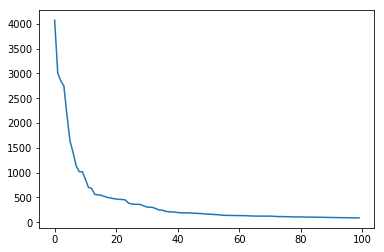

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

word_freq = sorted([f for t, f in Counter(tokens).items()], reverse=True)

# lets plot the frequency of the first 100 words of our text
plt.plot(range(len(word_freq[:100])), word_freq[:100])

# You just discovered that words in a text follow a power law!!! (https://en.wikipedia.org/wiki/Power_law)

# Congratulations! You just finished the first class. :)